# Viewing the dataset

This notebook demonstrates how to access metadata and arrays from the HDF5 dataset.

In [18]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

# Open the dataset

Make sure to update the filepath in the block below!

In [19]:
h5_filepath = '/data/bwedig/mejiro/training_set_dev/roman_data_v1.h5'  # TODO update this path!
f = h5py.File(h5_filepath, 'r')

In [20]:
# For now, the following bands are available
for key in f.keys():
    print(key)

F129
F184


In [21]:
# specify band
band = 'F184'

# collect a sample of true and false strong lenses
true_lenses, false_lenses = [], []
for i, uid in enumerate(f[band]):
    if f[band][uid].attrs.get('is_strong_lens', True):
        true_lenses.append(f[band][uid])
    else:
        false_lenses.append(f[band][uid])
    if i == 49:
        break

In [ ]:
# print metadata for a sample true lens
for attr, value in true_lenses[0].attrs.items():
    print(f"{attr}: {value}")

detector: ['1' 'Detector']
detector_position_x: ['1226' 'Detector X position']
detector_position_y: ['3679' 'Detector Y position']
exposure_time: ['642' 'Exposure time [seconds]']
filter: ['F184' 'Filter']
fov: ['5.17' 'Field of view [arcsec]']
instrument: ['WFI' 'Instrument']
is_strong_lens: True
lens_magnitude: ['20.61217233048749' 'Lens galaxy magnitude']
lensed_source_magnitude: ['20.48740734082492' 'Lensed source galaxy magnitude']
mejiro_version: ['2.0.0' 'mejiro version']
mu: ['1.6886283159047994' 'Flux-weighted magnification of source']
name: ['training_set_00000000' 'Unique identifier for system assigned by mejiro']
pixel_scale: ['0.11' 'Pixel scale [arcsec/pixel]']
sigma_v: ['None' 'Lens galaxy velocity dispersion [km/s]']
source_magnitude: ['21.056242509578706' 'Unlensed source galaxy magnitude']
theta_e: ['0.34392840383415335' 'Einstein radius [arcsec]']
units: ['Counts/sec' 'Units of pixel values']
z_lens: ['0.9773827762575582' 'Lens galaxy redshift']
z_source: ['2.8457720

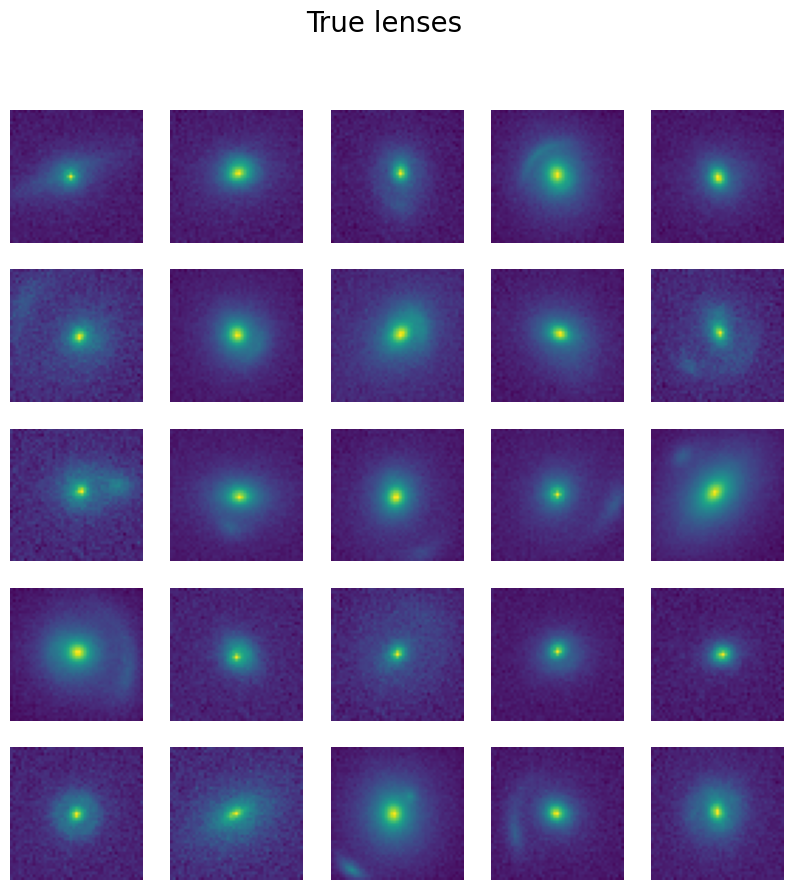

In [22]:
_, ax = plt.subplots(5, 5, figsize=(10, 10))
for i in range(25):
    ax.flat[i].imshow(np.log10(true_lenses[i]))
    ax.flat[i].axis('off')
plt.suptitle('True lenses', fontsize=20)
plt.show()

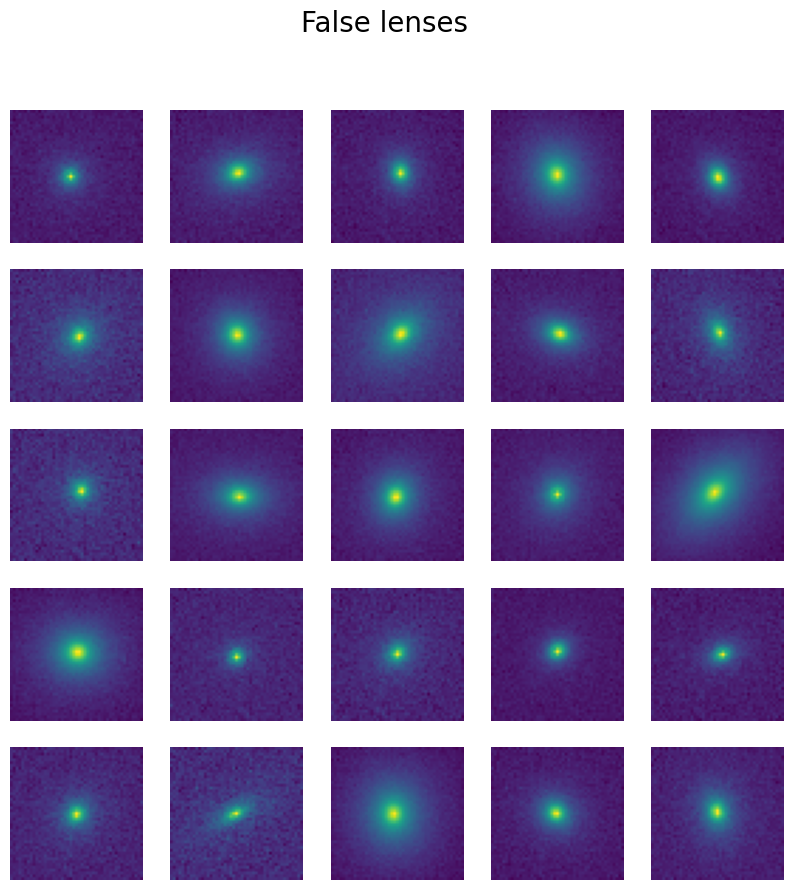

In [23]:
_, ax = plt.subplots(5, 5, figsize=(10, 10))
for i in range(25):
    ax.flat[i].imshow(np.log10(false_lenses[i]))
    ax.flat[i].axis('off')
plt.suptitle('False lenses', fontsize=20)
plt.show()